**Data Preprocessing & Cleaning Tweets**

Contents
1.   Lemmatization
2.   Stemmin
3.   Tokenazation



In [4]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [5]:
#Download NLTK packages
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
%%time

from nltk.corpus import stopwords

nltk.download('stopwords')
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
!pip install contractions


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 14.3 MB/s eta 0:00:00


In [9]:
!pip install langdetect


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=42e4e13b4b428ebf9e3110be55343ba72b434a23a2a7a5ba49b6c4ff167fc20a
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


In [10]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import string
import re
import contractions

#to detect text language
from langdetect import detect, LangDetectException

#stopwords
from nltk.corpus import stopwords

#Tokenization
from nltk.tokenize import word_tokenize

#Stemming
from nltk.stem import PorterStemmer

#Lemmatizing
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()


In [11]:
# Load csv file containing tweets dataset
def load_data():
    data = pd.read_csv(r"/content/[FULL COMBINED] All Keywords_States (Coordinates) - Snscrape.csv")
    return data

tweet1_df = load_data()
display(tweet1_df)

print('Number of original rows:', len(tweet1_df))


,Datetime,ID,Username,Text,Location
0,2022-02-01 00:18:19+00:00,1.490000e+18,HZMLRN,"I is lapar 🥲 (@ R&amp;R Perasing in Perasing, ...",Johor Bahru
1,2022-02-01 01:20:36+00:00,1.490000e+18,RazakZaha,Slowly rebuild pace.\n\nI got problem with kne...,Kuala Lumpur
2,2022-02-01 01:20:36+00:00,1.490000e+18,RazakZaha,Slowly rebuild pace.\n\nI got problem with kne...,Kuala Lumpur
3,2022-02-01 01:20:36+00:00,1.490000e+18,RazakZaha,Slowly rebuild pace.\n\nI got problem with kne...,Kuala Lumpur
4,2022-02-01 01:20:36+00:00,1.490000e+18,RazakZaha,Slowly rebuild pace.\n\nI got problem with kne...,Kuala Lumpur
...,...,...,...,...,...
34347,2023-03-30 23:41:11+00:00,1.640000e+18,NumanAfifi,@ashvinmenon Turns out they’re the best when t...,Kuala Lumpur
34348,2023-03-30 23:41:11+00:00,1.640000e+18,NumanAfifi,@ashvinmenon Turns out they’re the best when t...,Kuala Lumpur
34349,2023-03-30 23:41:11+00:00,1.640000e+18,NumanAfifi,@ashvinmenon Turns out they’re the best when t...,Kuala Lumpur
34350,2023-03-30 23:41:11+00:00,1.640000e+18,NumanAfifi,@ashvinmenon Turns out they’re the best when t...,Kuala Lumpur


Number of original rows: 34352


In [12]:
# Load csv file containing tweets dataset
def load_data():
    data = pd.read_csv(r"/content/[FULL COMBINED] All Keywords_Malaysia (Location).csv")
    return data

tweet2_df = load_data()
display(tweet2_df)

print('Number of original rows:', len(tweet2_df))


,Datetime,ID,Username,Text,Location
0,2022-02-01 00:18:19+00:00,1.490000e+18,HZMLRN,"I is lapar 🥲 (@ R&amp;R Perasing in Perasing, ...",Johor Bahru
1,2022-02-01 00:20:14+00:00,1.490000e+18,evaniaprilRS,"Suatu pagi-pagi buta di Siantar,\n\n🗣: aku lap...",NaN
2,2022-02-01 01:04:00+00:00,1.490000e+18,fahimzahar,Lapar... Angin dah .. sini pun jadi... (@ Tama...,Malaysia
3,2022-02-01 01:06:14+00:00,1.490000e+18,azlanowen,Dari jam 7 pagi sampe skrng jam 9 lewat msh mi...,"Kalimantan Timur, Indonesia"
4,2022-02-01 01:20:36+00:00,1.490000e+18,RazakZaha,Slowly rebuild pace.\n\nI got problem with kne...,Kuala Lumpur
...,...,...,...,...,...
40979,2023-03-30 23:56:59+00:00,1.640000e+18,EastEndJoe,@TaurusMeme @JillFanoO4 You’re making me hungry,East End Long Island
40980,2023-03-30 23:56:59+00:00,1.641590e+18,EastEndJoe,@TaurusMeme @JillFanoO4 You’re making me hungry,East End Long Island
40981,2023-03-30 23:57:11+00:00,1.640000e+18,farhinsyirh,"Hate the sin not the man, I know it's just a r...","Johore, Malaysia"
40982,2023-03-30 23:58:50+00:00,1.640000e+18,hungryhuman,@thew Love you too! 💖🙏🏾,CA


Number of original rows: 40984


In [13]:
tweets_df = pd.concat([tweet1_df, tweet2_df], ignore_index=True, sort=False)

In [14]:
tweets_df

,Datetime,ID,Username,Text,Location
0,2022-02-01 00:18:19+00:00,1.490000e+18,HZMLRN,"I is lapar 🥲 (@ R&amp;R Perasing in Perasing, ...",Johor Bahru
1,2022-02-01 01:20:36+00:00,1.490000e+18,RazakZaha,Slowly rebuild pace.\n\nI got problem with kne...,Kuala Lumpur
2,2022-02-01 01:20:36+00:00,1.490000e+18,RazakZaha,Slowly rebuild pace.\n\nI got problem with kne...,Kuala Lumpur
3,2022-02-01 01:20:36+00:00,1.490000e+18,RazakZaha,Slowly rebuild pace.\n\nI got problem with kne...,Kuala Lumpur
4,2022-02-01 01:20:36+00:00,1.490000e+18,RazakZaha,Slowly rebuild pace.\n\nI got problem with kne...,Kuala Lumpur
...,...,...,...,...,...
75331,2023-03-30 23:56:59+00:00,1.640000e+18,EastEndJoe,@TaurusMeme @JillFanoO4 You’re making me hungry,East End Long Island
75332,2023-03-30 23:56:59+00:00,1.641590e+18,EastEndJoe,@TaurusMeme @JillFanoO4 You’re making me hungry,East End Long Island
75333,2023-03-30 23:57:11+00:00,1.640000e+18,farhinsyirh,"Hate the sin not the man, I know it's just a r...","Johore, Malaysia"
75334,2023-03-30 23:58:50+00:00,1.640000e+18,hungryhuman,@thew Love you too! 💖🙏🏾,CA


In [15]:
#Drop unnecessary columns (ID)
new_df = tweets_df.drop(['ID'], axis=1)
display(new_df)

,Datetime,Username,Text,Location
0,2022-02-01 00:18:19+00:00,HZMLRN,"I is lapar 🥲 (@ R&amp;R Perasing in Perasing, ...",Johor Bahru
1,2022-02-01 01:20:36+00:00,RazakZaha,Slowly rebuild pace.\n\nI got problem with kne...,Kuala Lumpur
2,2022-02-01 01:20:36+00:00,RazakZaha,Slowly rebuild pace.\n\nI got problem with kne...,Kuala Lumpur
3,2022-02-01 01:20:36+00:00,RazakZaha,Slowly rebuild pace.\n\nI got problem with kne...,Kuala Lumpur
4,2022-02-01 01:20:36+00:00,RazakZaha,Slowly rebuild pace.\n\nI got problem with kne...,Kuala Lumpur
...,...,...,...,...
75331,2023-03-30 23:56:59+00:00,EastEndJoe,@TaurusMeme @JillFanoO4 You’re making me hungry,East End Long Island
75332,2023-03-30 23:56:59+00:00,EastEndJoe,@TaurusMeme @JillFanoO4 You’re making me hungry,East End Long Island
75333,2023-03-30 23:57:11+00:00,farhinsyirh,"Hate the sin not the man, I know it's just a r...","Johore, Malaysia"
75334,2023-03-30 23:58:50+00:00,hungryhuman,@thew Love you too! 💖🙏🏾,CA


In [16]:
new_df['Text'][5]

'Slowly rebuild pace.\n\nI got problem with knees injury and sudden hungry after first 4km.\n\nPathetic https://t.co/hkd2oeRnIX'

**Data Preprocessing**

In [17]:
# Initialisation globale pour éviter de recréer à chaque appel
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def expand_contractions(text):
    return contractions.fix(text)

def cleanedTweets(text):
    # Expand contractions
    text = expand_contractions(text)

    # Lowercase
    text = text.lower()

    # Remove mentions, hashtags, numbers, URLs, and punctuation
    text = re.sub(r'(@\w+|#\w+|\d+)', '', text)
    text = re.sub(r'http\S+|www.\S+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'[^\x00-\x7F]+',' ', text)  # Remove non-ASCII chars
    text = re.sub(r'\s+', ' ', text).strip()   # Remove extra spaces

    # Tokenization
    tokens = word_tokenize(text)

    # Stop word removal
    filtered_words = [w for w in tokens if w not in stop_words]

    # Lemmatization
    lemma_words = [lemmatizer.lemmatize(w) for w in filtered_words]

    # Stemming
    stem_words = [stemmer.stem(w) for w in lemma_words]

    # Return cleaned data
    return {
        'Cleaned_Text': " ".join(stem_words),
        'Tokens': tokens,
        'Filtered_Words': filtered_words,
        'Lemmatized_Words': lemma_words,
        'Stemmed_Words': stem_words
    }

In [18]:
# Apply the cleanedTweets function to the 'Text' column and create new columns for each phase
new_df[['Cleaned_Text', 'Tokens', 'Filtered_Words', 'Lemmatized_Words', 'Stemmed_Words']] = new_df['Text'].apply(cleanedTweets).apply(pd.Series)
display(new_df)

,Datetime,Username,Text,Location,Cleaned_Text,Tokens,Filtered_Words,Lemmatized_Words,Stemmed_Words
0,2022-02-01 00:18:19+00:00,HZMLRN,"I is lapar 🥲 (@ R&amp;R Perasing in Perasing, ...",Johor Bahru,lapar rampr peras peras terengganu,"[i, is, lapar, rampr, perasing, in, perasing, ...","[lapar, rampr, perasing, perasing, terengganu]","[lapar, rampr, perasing, perasing, terengganu]","[lapar, rampr, peras, peras, terengganu]"
1,2022-02-01 01:20:36+00:00,RazakZaha,Slowly rebuild pace.\n\nI got problem with kne...,Kuala Lumpur,slowli rebuild pace got problem knee injuri su...,"[slowly, rebuild, pace, i, got, problem, with,...","[slowly, rebuild, pace, got, problem, knees, i...","[slowly, rebuild, pace, got, problem, knee, in...","[slowli, rebuild, pace, got, problem, knee, in..."
2,2022-02-01 01:20:36+00:00,RazakZaha,Slowly rebuild pace.\n\nI got problem with kne...,Kuala Lumpur,slowli rebuild pace got problem knee injuri su...,"[slowly, rebuild, pace, i, got, problem, with,...","[slowly, rebuild, pace, got, problem, knees, i...","[slowly, rebuild, pace, got, problem, knee, in...","[slowli, rebuild, pace, got, problem, knee, in..."
3,2022-02-01 01:20:36+00:00,RazakZaha,Slowly rebuild pace.\n\nI got problem with kne...,Kuala Lumpur,slowli rebuild pace got problem knee injuri su...,"[slowly, rebuild, pace, i, got, problem, with,...","[slowly, rebuild, pace, got, problem, knees, i...","[slowly, rebuild, pace, got, problem, knee, in...","[slowli, rebuild, pace, got, problem, knee, in..."
4,2022-02-01 01:20:36+00:00,RazakZaha,Slowly rebuild pace.\n\nI got problem with kne...,Kuala Lumpur,slowli rebuild pace got problem knee injuri su...,"[slowly, rebuild, pace, i, got, problem, with,...","[slowly, rebuild, pace, got, problem, knees, i...","[slowly, rebuild, pace, got, problem, knee, in...","[slowli, rebuild, pace, got, problem, knee, in..."
...,...,...,...,...,...,...,...,...,...
75331,2023-03-30 23:56:59+00:00,EastEndJoe,@TaurusMeme @JillFanoO4 You’re making me hungry,East End Long Island,make hungri,"[you, are, making, me, hungry]","[making, hungry]","[making, hungry]","[make, hungri]"
75332,2023-03-30 23:56:59+00:00,EastEndJoe,@TaurusMeme @JillFanoO4 You’re making me hungry,East End Long Island,make hungri,"[you, are, making, me, hungry]","[making, hungry]","[making, hungry]","[make, hungri]"
75333,2023-03-30 23:57:11+00:00,farhinsyirh,"Hate the sin not the man, I know it's just a r...","Johore, Malaysia",hate sin man know record video still amaz stil...,"[hate, the, sin, not, the, man, i, know, it, i...","[hate, sin, man, know, recorded, video, still,...","[hate, sin, man, know, recorded, video, still,...","[hate, sin, man, know, record, video, still, a..."
75334,2023-03-30 23:58:50+00:00,hungryhuman,@thew Love you too! 💖🙏🏾,CA,love,"[love, you, too]",[love],[love],[love]


In [19]:
new_df['Cleaned_Tweets'] = new_df['Text'].apply(lambda x: cleanedTweets(x))
display(new_df)

,Datetime,Username,Text,Location,Cleaned_Text,Tokens,Filtered_Words,Lemmatized_Words,Stemmed_Words,Cleaned_Tweets
0,2022-02-01 00:18:19+00:00,HZMLRN,"I is lapar 🥲 (@ R&amp;R Perasing in Perasing, ...",Johor Bahru,lapar rampr peras peras terengganu,"[i, is, lapar, rampr, perasing, in, perasing, ...","[lapar, rampr, perasing, perasing, terengganu]","[lapar, rampr, perasing, perasing, terengganu]","[lapar, rampr, peras, peras, terengganu]",{'Cleaned_Text': 'lapar rampr peras peras tere...
1,2022-02-01 01:20:36+00:00,RazakZaha,Slowly rebuild pace.\n\nI got problem with kne...,Kuala Lumpur,slowli rebuild pace got problem knee injuri su...,"[slowly, rebuild, pace, i, got, problem, with,...","[slowly, rebuild, pace, got, problem, knees, i...","[slowly, rebuild, pace, got, problem, knee, in...","[slowli, rebuild, pace, got, problem, knee, in...",{'Cleaned_Text': 'slowli rebuild pace got prob...
2,2022-02-01 01:20:36+00:00,RazakZaha,Slowly rebuild pace.\n\nI got problem with kne...,Kuala Lumpur,slowli rebuild pace got problem knee injuri su...,"[slowly, rebuild, pace, i, got, problem, with,...","[slowly, rebuild, pace, got, problem, knees, i...","[slowly, rebuild, pace, got, problem, knee, in...","[slowli, rebuild, pace, got, problem, knee, in...",{'Cleaned_Text': 'slowli rebuild pace got prob...
3,2022-02-01 01:20:36+00:00,RazakZaha,Slowly rebuild pace.\n\nI got problem with kne...,Kuala Lumpur,slowli rebuild pace got problem knee injuri su...,"[slowly, rebuild, pace, i, got, problem, with,...","[slowly, rebuild, pace, got, problem, knees, i...","[slowly, rebuild, pace, got, problem, knee, in...","[slowli, rebuild, pace, got, problem, knee, in...",{'Cleaned_Text': 'slowli rebuild pace got prob...
4,2022-02-01 01:20:36+00:00,RazakZaha,Slowly rebuild pace.\n\nI got problem with kne...,Kuala Lumpur,slowli rebuild pace got problem knee injuri su...,"[slowly, rebuild, pace, i, got, problem, with,...","[slowly, rebuild, pace, got, problem, knees, i...","[slowly, rebuild, pace, got, problem, knee, in...","[slowli, rebuild, pace, got, problem, knee, in...",{'Cleaned_Text': 'slowli rebuild pace got prob...
...,...,...,...,...,...,...,...,...,...,...
75331,2023-03-30 23:56:59+00:00,EastEndJoe,@TaurusMeme @JillFanoO4 You’re making me hungry,East End Long Island,make hungri,"[you, are, making, me, hungry]","[making, hungry]","[making, hungry]","[make, hungri]","{'Cleaned_Text': 'make hungri', 'Tokens': ['yo..."
75332,2023-03-30 23:56:59+00:00,EastEndJoe,@TaurusMeme @JillFanoO4 You’re making me hungry,East End Long Island,make hungri,"[you, are, making, me, hungry]","[making, hungry]","[making, hungry]","[make, hungri]","{'Cleaned_Text': 'make hungri', 'Tokens': ['yo..."
75333,2023-03-30 23:57:11+00:00,farhinsyirh,"Hate the sin not the man, I know it's just a r...","Johore, Malaysia",hate sin man know record video still amaz stil...,"[hate, the, sin, not, the, man, i, know, it, i...","[hate, sin, man, know, recorded, video, still,...","[hate, sin, man, know, recorded, video, still,...","[hate, sin, man, know, record, video, still, a...",{'Cleaned_Text': 'hate sin man know record vid...
75334,2023-03-30 23:58:50+00:00,hungryhuman,@thew Love you too! 💖🙏🏾,CA,love,"[love, you, too]",[love],[love],[love],"{'Cleaned_Text': 'love', 'Tokens': ['love', 'y..."


In [20]:
import pandas as pd
import ast

def extract_cleaned_text(value):
    if pd.isna(value):
        return ""
    try:
        d = ast.literal_eval(value) if isinstance(value, str) else value
        return d.get("Cleaned_Text", "")
    except Exception:
        return ""

new_df['Cleaned_Text'] = new_df['Cleaned_Tweets'].apply(extract_cleaned_text)

# Preview
print(new_df[['Cleaned_Tweets', 'Cleaned_Text']].head())


                                      Cleaned_Tweets  \
0  {'Cleaned_Text': 'lapar rampr peras peras tere...   
1  {'Cleaned_Text': 'slowli rebuild pace got prob...   
2  {'Cleaned_Text': 'slowli rebuild pace got prob...   
3  {'Cleaned_Text': 'slowli rebuild pace got prob...   
4  {'Cleaned_Text': 'slowli rebuild pace got prob...   

                                        Cleaned_Text  
0                 lapar rampr peras peras terengganu  
1  slowli rebuild pace got problem knee injuri su...  
2  slowli rebuild pace got problem knee injuri su...  
3  slowli rebuild pace got problem knee injuri su...  
4  slowli rebuild pace got problem knee injuri su...  


In [21]:
new_df.columns

Index(['Datetime', 'Username', 'Text', 'Location', 'Cleaned_Text', 'Tokens',
       'Filtered_Words', 'Lemmatized_Words', 'Stemmed_Words',
       'Cleaned_Tweets'],
      dtype='object')

In [22]:
final_df = new_df[['Datetime', 'Username', 'Location', 'Cleaned_Text']].copy()
final_df.head()

,Datetime,Username,Location,Cleaned_Text
0,2022-02-01 00:18:19+00:00,HZMLRN,Johor Bahru,lapar rampr peras peras terengganu
1,2022-02-01 01:20:36+00:00,RazakZaha,Kuala Lumpur,slowli rebuild pace got problem knee injuri su...
2,2022-02-01 01:20:36+00:00,RazakZaha,Kuala Lumpur,slowli rebuild pace got problem knee injuri su...
3,2022-02-01 01:20:36+00:00,RazakZaha,Kuala Lumpur,slowli rebuild pace got problem knee injuri su...
4,2022-02-01 01:20:36+00:00,RazakZaha,Kuala Lumpur,slowli rebuild pace got problem knee injuri su...


In [23]:
final_df.shape

(75336, 4)

**Data Cleaning**

In [24]:
final_df = final_df.drop_duplicates(subset='Cleaned_Text')


In [25]:
final_df

,Datetime,Username,Location,Cleaned_Text
0,2022-02-01 00:18:19+00:00,HZMLRN,Johor Bahru,lapar rampr peras peras terengganu
1,2022-02-01 01:20:36+00:00,RazakZaha,Kuala Lumpur,slowli rebuild pace got problem knee injuri su...
9,2022-02-01 01:32:54+00:00,RazakZaha,Kuala Lumpur,slow tu selalu masalah lapar tgh lari
13,2022-02-01 02:54:44+00:00,teekayzamri,Kuala Lumpur,lalalala lapar nasi restoran sambal hijau kual...
16,2022-02-01 04:08:38+00:00,achik_ezam,Kuala Lumpur,kind hungri salad makan luar
...,...,...,...,...
75327,2023-03-30 23:45:13+00:00,Charrlygirl,MA,worri prosecut team famili also worri frenzi whip
75328,2023-03-30 23:49:23+00:00,angel19971102,Taiwan,love much clark must alway worri bruce dread l...
75330,2023-03-30 23:55:16+00:00,AhmadMuhyie,Jember,ah lemah iman banget puasa tanpa ujian real g ...
75333,2023-03-30 23:57:11+00:00,farhinsyirh,"Johore, Malaysia",hate sin man know record video still amaz stil...


In [26]:
import re

def remove_emojis(text):
    if pd.isna(text):
        return ""

    # Emoji pattern
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map
        u"\U0001F1E0-\U0001F1FF"  # flags
        u"\U00002700-\U000027BF"  # other symbols
        u"\U0001F900-\U0001F9FF"  # supplemental symbols and pictographs
        u"\U0001FA70-\U0001FAFF"  # symbols and pictographs extended-A
        u"\U000025A0-\U00002BEF"  # geometric shapes and misc symbols
        "]+", flags=re.UNICODE)

    return emoji_pattern.sub(r'', text)

# Apply to the 'Location' column
final_df['Location'] = final_df['Location'].apply(remove_emojis)


In [27]:
# Count duplicates
duplicate_count = final_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


In [28]:
final_df.to_csv('CLEANED.csv', index=False)


In [29]:
df = pd.read_csv('/content/CLEANED.csv')

In [30]:
df.shape

(31722, 4)

In [31]:
from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0  # for consistent results

def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'

# Apply language detection to each tweet
df['Language'] = df['Cleaned_Text'].apply(detect_language)


In [32]:
language_counts = df['Language'].value_counts()

print(language_counts)


Language
id         19813
en          6592
tl          2128
no           370
sw           309
af           304
nl           265
da           214
cy           205
so           187
sv           185
ca           166
et           160
it           146
de           114
ro           100
sq            60
es            56
fr            54
vi            52
lv            46
hr            46
fi            42
sl            34
pl            29
pt            11
hu            10
lt             8
tr             8
sk             7
unknown        1
Name: count, dtype: int64


In [33]:
df['Detected_Language'] = df['Cleaned_Text'].apply(lambda x: detect(x) if isinstance(x, str) and len(x.split()) > 2 else 'too_short')

In [34]:
lang_counts = df['Detected_Language'].value_counts()

print(lang_counts)

Detected_Language
id           19297
en            6496
tl            1915
too_short     1352
no             343
af             280
sw             235
nl             227
da             199
sv             168
cy             167
so             157
et             150
it             136
ca             130
ro              87
de              79
sq              51
hr              40
fr              40
sl              30
es              27
fi              26
lv              25
vi              23
pl              17
pt               7
hu               6
lt               5
tr               5
sk               2
Name: count, dtype: int64


In [35]:
pip install matplotlib

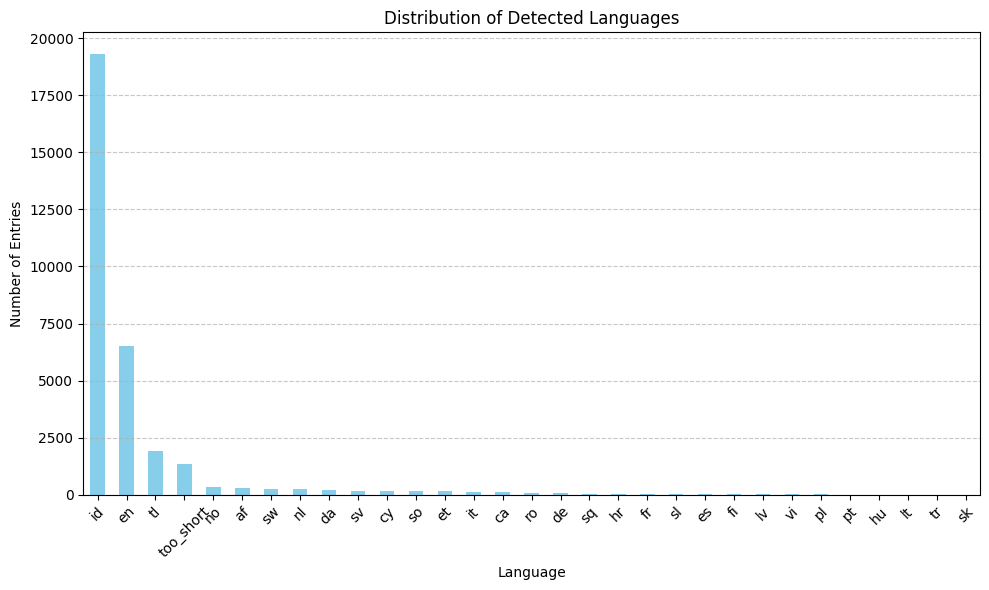

In [36]:
import matplotlib.pyplot as plt

lang_counts = df['Detected_Language'].value_counts()

plt.figure(figsize=(10, 6))
lang_counts.plot(kind='bar', color='skyblue')

plt.title('Distribution of Detected Languages')
plt.xlabel('Language')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [37]:
filtered_counts = lang_counts.drop(['too_short'], errors='ignore')

In [38]:
filtered_counts

,count
Detected_Language,
id,19297
en,6496
tl,1915
no,343
af,280
sw,235
nl,227
da,199
sv,168


In [39]:
df

,Datetime,Username,Location,Cleaned_Text,Language,Detected_Language
0,2022-02-01 00:18:19+00:00,HZMLRN,Johor Bahru,lapar rampr peras peras terengganu,id,id
1,2022-02-01 01:20:36+00:00,RazakZaha,Kuala Lumpur,slowli rebuild pace got problem knee injuri su...,en,en
2,2022-02-01 01:32:54+00:00,RazakZaha,Kuala Lumpur,slow tu selalu masalah lapar tgh lari,id,id
3,2022-02-01 02:54:44+00:00,teekayzamri,Kuala Lumpur,lalalala lapar nasi restoran sambal hijau kual...,id,id
4,2022-02-01 04:08:38+00:00,achik_ezam,Kuala Lumpur,kind hungri salad makan luar,id,id
...,...,...,...,...,...,...
31717,2023-03-30 23:45:13+00:00,Charrlygirl,MA,worri prosecut team famili also worri frenzi whip,en,en
31718,2023-03-30 23:49:23+00:00,angel19971102,Taiwan,love much clark must alway worri bruce dread l...,en,en
31719,2023-03-30 23:55:16+00:00,AhmadMuhyie,Jember,ah lemah iman banget puasa tanpa ujian real g ...,id,id
31720,2023-03-30 23:57:11+00:00,farhinsyirh,"Johore, Malaysia",hate sin man know record video still amaz stil...,en,en


In [40]:
df.columns

Index(['Datetime', 'Username', 'Location', 'Cleaned_Text', 'Language',
       'Detected_Language'],
      dtype='object')

In [41]:
# Filter rows with selected languages
languages_to_keep = ['id', 'en', 'tl']
filtered_df = df[df['Detected_Language'].isin(languages_to_keep)]

# Get distribution
language_distribution = filtered_df['Detected_Language'].value_counts().reset_index()
language_distribution.columns = ['language', 'count']

# Calculate percentage
total = language_distribution['count'].sum()
language_distribution['percentage'] = (language_distribution['count'] / total) * 100

print(language_distribution)

  language  count  percentage
0       id  19297   69.644146
1       en   6496   23.444493
2       tl   1915    6.911361


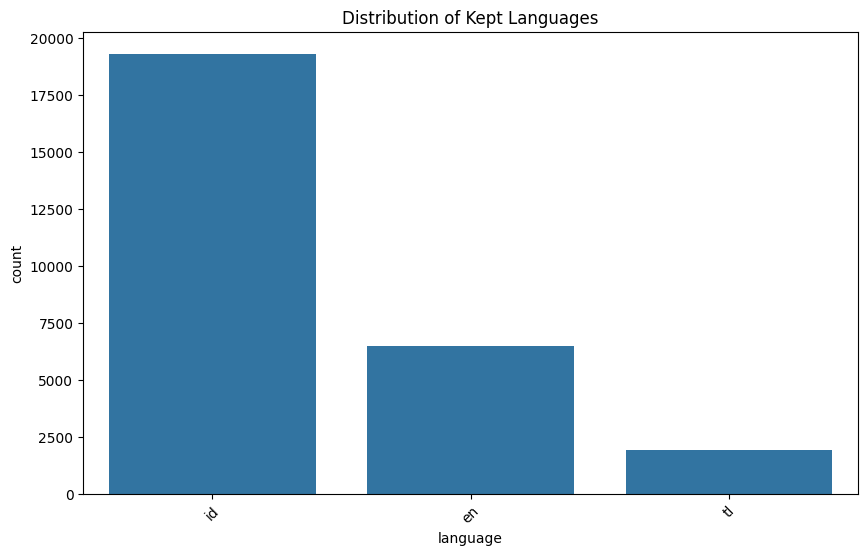

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=language_distribution, x='language', y='count')
plt.title('Distribution of Kept Languages')
plt.xticks(rotation=45)
plt.show()

In [43]:
filtered_df

,Datetime,Username,Location,Cleaned_Text,Language,Detected_Language
0,2022-02-01 00:18:19+00:00,HZMLRN,Johor Bahru,lapar rampr peras peras terengganu,id,id
1,2022-02-01 01:20:36+00:00,RazakZaha,Kuala Lumpur,slowli rebuild pace got problem knee injuri su...,en,en
2,2022-02-01 01:32:54+00:00,RazakZaha,Kuala Lumpur,slow tu selalu masalah lapar tgh lari,id,id
3,2022-02-01 02:54:44+00:00,teekayzamri,Kuala Lumpur,lalalala lapar nasi restoran sambal hijau kual...,id,id
4,2022-02-01 04:08:38+00:00,achik_ezam,Kuala Lumpur,kind hungri salad makan luar,id,id
...,...,...,...,...,...,...
31716,2023-03-30 23:39:13+00:00,damnedpunk_,"Jakarta, Indonesia",hmm kereta ekonomi kereta yang harga tiketnya ...,id,id
31717,2023-03-30 23:45:13+00:00,Charrlygirl,MA,worri prosecut team famili also worri frenzi whip,en,en
31718,2023-03-30 23:49:23+00:00,angel19971102,Taiwan,love much clark must alway worri bruce dread l...,en,en
31719,2023-03-30 23:55:16+00:00,AhmadMuhyie,Jember,ah lemah iman banget puasa tanpa ujian real g ...,id,id


In [44]:
df_indonesian = filtered_df[df['Detected_Language'] == 'id'].copy()
df_english = filtered_df[df['Detected_Language'] == 'en'].copy()
df_tagalog = filtered_df[df['Detected_Language'] == 'tl'].copy()

<ipython-input-44-daaacc1b41f5>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_indonesian = filtered_df[df['Detected_Language'] == 'id'].copy()
<ipython-input-44-daaacc1b41f5>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_english = filtered_df[df['Detected_Language'] == 'en'].copy()
<ipython-input-44-daaacc1b41f5>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_tagalog = filtered_df[df['Detected_Language'] == 'tl'].copy()


In [45]:
df_indonesian

,Datetime,Username,Location,Cleaned_Text,Language,Detected_Language
0,2022-02-01 00:18:19+00:00,HZMLRN,Johor Bahru,lapar rampr peras peras terengganu,id,id
2,2022-02-01 01:32:54+00:00,RazakZaha,Kuala Lumpur,slow tu selalu masalah lapar tgh lari,id,id
3,2022-02-01 02:54:44+00:00,teekayzamri,Kuala Lumpur,lalalala lapar nasi restoran sambal hijau kual...,id,id
4,2022-02-01 04:08:38+00:00,achik_ezam,Kuala Lumpur,kind hungri salad makan luar,id,id
5,2022-02-01 08:10:40+00:00,chicanoz,KJ jadi DJ,kimi betul lapar nak mam pagi tadi mkn roti bu...,id,id
...,...,...,...,...,...,...
31708,2023-03-30 23:26:59+00:00,cikarang_story_,"Cikarang, Indonesia",kalo lapar bacalah allahumma barik lana fimaa ...,id,id
31709,2023-03-30 23:27:07+00:00,agheenaa,Malaysia,liter bgn sahur untuk minum air jaa pastu tak ...,id,id
31712,2023-03-30 23:36:37+00:00,didut,Jakarta,efek kedua selain gak butuh kopi adalah mata g...,id,id
31716,2023-03-30 23:39:13+00:00,damnedpunk_,"Jakarta, Indonesia",hmm kereta ekonomi kereta yang harga tiketnya ...,id,id


In [64]:
df_indonesian.to_csv('indon.csv', index=False)

In [47]:
pip install transformers sentencepiece


In [48]:
!pip install hf_xet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 42.4 MB/s eta 0:00:00


**⚡️ Optimized Script for Batched Indonesian → English Translation on GPU**

In [49]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from tqdm import tqdm
import torch

# === CONFIG ===
csv_path = "/content/indon.csv"                  # Your CSV file
text_column = "Cleaned_Text"       # Column with Indonesian sentences
output_column = "Cleaned_Text_translation" # New column name
output_csv_path = "indo_translated_data.csv"
batch_size = 32                        # Batch size (tune as needed)

# === Load model and tokenizer ===
model_name = "facebook/nllb-200-distilled-600M"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

# === Use GPU if available ===
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# === Language codes ===
src_lang = "ind_Latn"
tgt_lang = "eng_Latn"
tokenizer.src_lang = src_lang

# === Load dataset ===
df = pd.read_csv(csv_path)
texts = df[text_column].fillna("").astype(str).tolist()

# === Batched translation ===
def translate_batch(text_list):
    inputs = tokenizer(text_list, return_tensors="pt", padding=True, truncation=True, max_length=256)
    inputs = {key: val.to(device) for key, val in inputs.items()}
    outputs = model.generate(
        **inputs,
        forced_bos_token_id=tokenizer.convert_tokens_to_ids(tgt_lang),
        max_length=256
    )
    return [tokenizer.decode(t, skip_special_tokens=True) for t in outputs]

# === Apply batching ===
translated = []
for i in tqdm(range(0, len(texts), batch_size)):
    batch = texts[i:i + batch_size]
    translated_batch = translate_batch(batch)
    translated.extend(translated_batch)

# === Save results ===
df[output_column] = translated
df.to_csv(output_csv_path, index=False)

print(f"✅ Translation complete! Saved to '{output_csv_path}'")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/564 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/4.85M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.3M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/3.55k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/846 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.46G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/189 [00:00<?, ?B/s]

  0%|          | 0/604 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/2.46G [00:00<?, ?B/s]

100%|██████████| 604/604 [26:44<00:00,  2.66s/it]

✅ Translation complete! Saved to 'indo_translated_data.csv'


In [52]:
td_df= pd.read_csv('/content/indo_translated_data.csv')

In [53]:
td_df

,Datetime,Username,Location,Cleaned_Text,Language,Detected_Language,Cleaned_Text_translation
0,2022-02-01 00:18:19+00:00,HZMLRN,Johor Bahru,lapar rampr peras peras terengganu,id,id,hungry rampr rice rice from terengganu
1,2022-02-01 01:32:54+00:00,RazakZaha,Kuala Lumpur,slow tu selalu masalah lapar tgh lari,id,id,Slow is always a problem of hunger.
2,2022-02-01 02:54:44+00:00,teekayzamri,Kuala Lumpur,lalalala lapar nasi restoran sambal hijau kual...,id,id,lalalala hungry rice restaurant sambal green k...
3,2022-02-01 04:08:38+00:00,achik_ezam,Kuala Lumpur,kind hungri salad makan luar,id,id,kind of hungry salad eating out
4,2022-02-01 08:10:40+00:00,chicanoz,KJ jadi DJ,kimi betul lapar nak mam pagi tadi mkn roti bu...,id,id,Kimi's really hungry. I'm going to eat a piece...
...,...,...,...,...,...,...,...
19292,2023-03-30 23:26:59+00:00,cikarang_story_,"Cikarang, Indonesia",kalo lapar bacalah allahumma barik lana fimaa ...,id,id,If you are hungry read allahumma barik lana fi...
19293,2023-03-30 23:27:07+00:00,agheenaa,Malaysia,liter bgn sahur untuk minum air jaa pastu tak ...,id,id,Lt is not cheap to drink water ja pastu not to...
19294,2023-03-30 23:36:37+00:00,didut,Jakarta,efek kedua selain gak butuh kopi adalah mata g...,id,id,The second effect besides not needing coffee i...
19295,2023-03-30 23:39:13+00:00,damnedpunk_,"Jakarta, Indonesia",hmm kereta ekonomi kereta yang harga tiketnya ...,id,id,Hmm economy train train that price of the tick...


In [55]:
td_df.columns

Index(['Datetime', 'Username', 'Location', 'Cleaned_Text', 'Language',
       'Detected_Language', 'Cleaned_Text_translation'],
      dtype='object')

In [66]:
new_df = td_df[['Datetime','Username', 'Location', 'Cleaned_Text_translation']].copy()
new_df

,Datetime,Username,Location,Cleaned_Text_translation
0,2022-02-01 00:18:19+00:00,HZMLRN,Johor Bahru,hungry rampr rice rice from terengganu
1,2022-02-01 01:32:54+00:00,RazakZaha,Kuala Lumpur,Slow is always a problem of hunger.
2,2022-02-01 02:54:44+00:00,teekayzamri,Kuala Lumpur,lalalala hungry rice restaurant sambal green k...
3,2022-02-01 04:08:38+00:00,achik_ezam,Kuala Lumpur,kind of hungry salad eating out
4,2022-02-01 08:10:40+00:00,chicanoz,KJ jadi DJ,Kimi's really hungry. I'm going to eat a piece...
...,...,...,...,...
19292,2023-03-30 23:26:59+00:00,cikarang_story_,"Cikarang, Indonesia",If you are hungry read allahumma barik lana fi...
19293,2023-03-30 23:27:07+00:00,agheenaa,Malaysia,Lt is not cheap to drink water ja pastu not to...
19294,2023-03-30 23:36:37+00:00,didut,Jakarta,The second effect besides not needing coffee i...
19295,2023-03-30 23:39:13+00:00,damnedpunk_,"Jakarta, Indonesia",Hmm economy train train that price of the tick...


In [67]:
new_df.to_csv('indon_transla.csv', index=False)

In [68]:
df_english.to_csv('eng.csv', index=False)

In [70]:
df_tagalog.to_csv('tagalog.csv', index=False)

In [71]:
df_tagalog

,Datetime,Username,Location,Cleaned_Text,Language,Detected_Language
35,2022-02-02 10:56:39+00:00,Faris111,"Kuala Lumpur City, Kuala Lumpu",gila kentang lapar,tl,tl
60,2022-02-03 17:32:34+00:00,NabellaAnuar,Setia Alam,geng group whatsapp dok cerita pasal makan puk...,tl,tl
62,2022-02-03 23:57:55+00:00,zazlysuffyan_,Putrajaya~Pmtg Pauh,pagi nie katanya ada orang sponsor breakfast l...,tl,tl
85,2022-02-05 07:20:56+00:00,aneemanimii,NaN,lapar rasa nak makan orang,tl,tl
105,2022-02-06 01:49:56+00:00,muhdbadrunamin,NaN,alolo awat ni lapar cendol ka hahahahhaha,tl,tl
...,...,...,...,...,...,...
31543,2023-03-30 15:50:11+00:00,Bashvia15Jing,Singapore,jusko tago sa screen yong kaba ko rin yong wor...,tl,tl
31570,2023-03-30 16:35:17+00:00,naadiraisyajay,Malaysia,nanti lapar bila azan zohor asar penat gila ha...,tl,tl
31600,2023-03-30 17:50:45+00:00,francisANNEPsol,"Magdalena, Laguna",hungri much gusto ko spag,tl,tl
31619,2023-03-30 18:30:18+00:00,nnrxnd,Indonesia,yaampun mana lagi nahan lapar,tl,tl


In [72]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from tqdm import tqdm
import torch

# === CONFIG ===
csv_path = "/content/tagalog.csv"                  # Your CSV file
text_column = "Cleaned_Text"       # Column with Indonesian sentences
output_column = "Cleaned_Text_translation" # New column name
output_csv_path = "talog_translated_data.csv"
batch_size = 32                        # Batch size (tune as needed)

# === Load model and tokenizer ===
model_name = "facebook/nllb-200-distilled-600M"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

# === Use GPU if available ===
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# === Language codes ===
src_lang = "ind_Latn"
tgt_lang = "eng_Latn"
tokenizer.src_lang = src_lang

# === Load dataset ===
df = pd.read_csv(csv_path)
texts = df[text_column].fillna("").astype(str).tolist()

# === Batched translation ===
def translate_batch(text_list):
    inputs = tokenizer(text_list, return_tensors="pt", padding=True, truncation=True, max_length=256)
    inputs = {key: val.to(device) for key, val in inputs.items()}
    outputs = model.generate(
        **inputs,
        forced_bos_token_id=tokenizer.convert_tokens_to_ids(tgt_lang),
        max_length=256
    )
    return [tokenizer.decode(t, skip_special_tokens=True) for t in outputs]

# === Apply batching ===
translated = []
for i in tqdm(range(0, len(texts), batch_size)):
    batch = texts[i:i + batch_size]
    translated_batch = translate_batch(batch)
    translated.extend(translated_batch)

# === Save results ===
df[output_column] = translated
df.to_csv(output_csv_path, index=False)

print(f"✅ Translation complete! Saved to '{output_csv_path}'")


100%|██████████| 60/60 [02:10<00:00,  2.17s/it]

✅ Translation complete! Saved to 'talog_translated_data.csv'


In [73]:
tl_df= pd.read_csv('/content/talog_translated_data.csv')

In [74]:
tl_df

,Datetime,Username,Location,Cleaned_Text,Language,Detected_Language,Cleaned_Text_translation
0,2022-02-02 10:56:39+00:00,Faris111,"Kuala Lumpur City, Kuala Lumpu",gila kentang lapar,tl,tl,Mad potatoes are hungry
1,2022-02-03 17:32:34+00:00,NabellaAnuar,Setia Alam,geng group whatsapp dok cerita pasal makan puk...,tl,tl,The group whatsapp doc story about eating this...
2,2022-02-03 23:57:55+00:00,zazlysuffyan_,Putrajaya~Pmtg Pauh,pagi nie katanya ada orang sponsor breakfast l...,tl,tl,This morning he said there was a sponsor hungr...
3,2022-02-05 07:20:56+00:00,aneemanimii,NaN,lapar rasa nak makan orang,tl,tl,Hungry to eat people
4,2022-02-06 01:49:56+00:00,muhdbadrunamin,NaN,alolo awat ni lapar cendol ka hahahahhaha,tl,tl,I'm hungry for a little bit of food.
...,...,...,...,...,...,...,...
1910,2023-03-30 15:50:11+00:00,Bashvia15Jing,Singapore,jusko tago sa screen yong kaba ko rin yong wor...,tl,tl,"Just look at the screen, and you'll see."
1911,2023-03-30 16:35:17+00:00,naadiraisyajay,Malaysia,nanti lapar bila azan zohor asar penat gila ha...,tl,tl,I'll be hungry when Azan zohor asar is tired
1912,2023-03-30 17:50:45+00:00,francisANNEPsol,"Magdalena, Laguna",hungri much gusto ko spag,tl,tl,Hungry very gusto ko spag
1913,2023-03-30 18:30:18+00:00,nnrxnd,Indonesia,yaampun mana lagi nahan lapar,tl,tl,"Yeah, where else can I keep the hunger?"


In [75]:
neww_df = tl_df[['Datetime','Username', 'Location', 'Cleaned_Text_translation']].copy()
neww_df

,Datetime,Username,Location,Cleaned_Text_translation
0,2022-02-02 10:56:39+00:00,Faris111,"Kuala Lumpur City, Kuala Lumpu",Mad potatoes are hungry
1,2022-02-03 17:32:34+00:00,NabellaAnuar,Setia Alam,The group whatsapp doc story about eating this...
2,2022-02-03 23:57:55+00:00,zazlysuffyan_,Putrajaya~Pmtg Pauh,This morning he said there was a sponsor hungr...
3,2022-02-05 07:20:56+00:00,aneemanimii,NaN,Hungry to eat people
4,2022-02-06 01:49:56+00:00,muhdbadrunamin,NaN,I'm hungry for a little bit of food.
...,...,...,...,...
1910,2023-03-30 15:50:11+00:00,Bashvia15Jing,Singapore,"Just look at the screen, and you'll see."
1911,2023-03-30 16:35:17+00:00,naadiraisyajay,Malaysia,I'll be hungry when Azan zohor asar is tired
1912,2023-03-30 17:50:45+00:00,francisANNEPsol,"Magdalena, Laguna",Hungry very gusto ko spag
1913,2023-03-30 18:30:18+00:00,nnrxnd,Indonesia,"Yeah, where else can I keep the hunger?"


In [88]:
df_english

,Datetime,Username,Location,Cleaned_Text,Language,Detected_Language
1,2022-02-01 01:20:36+00:00,RazakZaha,Kuala Lumpur,slowli rebuild pace got problem knee injuri su...,en,en
7,2022-02-01 09:22:51+00:00,kyairen,Kuala Lumpur,kelaparan half briton coffe,en,en
30,2022-02-02 07:24:58+00:00,Eilarashid,MALAYSIA,come back night club look breakfast hungri dea...,en,en
32,2022-02-02 08:52:01+00:00,azlinyasmin,Malaysia,tell wife cri slept shirt even show earli brea...,en,en
47,2022-02-03 11:24:05+00:00,Amisaha8,Kuala Lumpur,done booster dose today alhamdulillah major si...,en,en
...,...,...,...,...,...,...
31714,2023-03-30 23:37:41+00:00,haidarbajrai,"Batu Pahat, Johor",know day sister belikan ond size sen ada biji ...,en,en
31715,2023-03-30 23:37:42+00:00,xbondgee,Visayas,awp dragon lore qualiti suffic hunger prod gen...,en,en
31717,2023-03-30 23:45:13+00:00,Charrlygirl,MA,worri prosecut team famili also worri frenzi whip,en,en
31718,2023-03-30 23:49:23+00:00,angel19971102,Taiwan,love much clark must alway worri bruce dread l...,en,en


In [92]:
eng_df = df_english[['Datetime','Username', 'Location', 'Cleaned_Text']].copy()
eng_df

,Datetime,Username,Location,Cleaned_Text
1,2022-02-01 01:20:36+00:00,RazakZaha,Kuala Lumpur,slowli rebuild pace got problem knee injuri su...
7,2022-02-01 09:22:51+00:00,kyairen,Kuala Lumpur,kelaparan half briton coffe
30,2022-02-02 07:24:58+00:00,Eilarashid,MALAYSIA,come back night club look breakfast hungri dea...
32,2022-02-02 08:52:01+00:00,azlinyasmin,Malaysia,tell wife cri slept shirt even show earli brea...
47,2022-02-03 11:24:05+00:00,Amisaha8,Kuala Lumpur,done booster dose today alhamdulillah major si...
...,...,...,...,...
31714,2023-03-30 23:37:41+00:00,haidarbajrai,"Batu Pahat, Johor",know day sister belikan ond size sen ada biji ...
31715,2023-03-30 23:37:42+00:00,xbondgee,Visayas,awp dragon lore qualiti suffic hunger prod gen...
31717,2023-03-30 23:45:13+00:00,Charrlygirl,MA,worri prosecut team famili also worri frenzi whip
31718,2023-03-30 23:49:23+00:00,angel19971102,Taiwan,love much clark must alway worri bruce dread l...


In [76]:
neww_df.to_csv('tl_transla.csv', index=False)

In [107]:
new_df = new_df.rename(columns={'Cleaned_Text_translation': 'Cleaned_Text'})
neww_df = new_df.rename(columns={'Cleaned_Text_translation': 'Cleaned_Text'})

In [110]:
new_df = new_df.rename(columns={'Cleaned_text': 'Cleaned_Text'})
neww_df = new_df.rename(columns={'Cleaned_text': 'Cleaned_Text'})

In [111]:
eng_df

,Datetime,Username,Location,Cleaned_Text
1,2022-02-01 01:20:36+00:00,RazakZaha,Kuala Lumpur,slowli rebuild pace got problem knee injuri su...
7,2022-02-01 09:22:51+00:00,kyairen,Kuala Lumpur,kelaparan half briton coffe
30,2022-02-02 07:24:58+00:00,Eilarashid,MALAYSIA,come back night club look breakfast hungri dea...
32,2022-02-02 08:52:01+00:00,azlinyasmin,Malaysia,tell wife cri slept shirt even show earli brea...
47,2022-02-03 11:24:05+00:00,Amisaha8,Kuala Lumpur,done booster dose today alhamdulillah major si...
...,...,...,...,...
31714,2023-03-30 23:37:41+00:00,haidarbajrai,"Batu Pahat, Johor",know day sister belikan ond size sen ada biji ...
31715,2023-03-30 23:37:42+00:00,xbondgee,Visayas,awp dragon lore qualiti suffic hunger prod gen...
31717,2023-03-30 23:45:13+00:00,Charrlygirl,MA,worri prosecut team famili also worri frenzi whip
31718,2023-03-30 23:49:23+00:00,angel19971102,Taiwan,love much clark must alway worri bruce dread l...


In [112]:
new_df

,Datetime,Username,Location,Cleaned_Text
0,2022-02-01 00:18:19+00:00,HZMLRN,Johor Bahru,hungry rampr rice rice from terengganu
1,2022-02-01 01:32:54+00:00,RazakZaha,Kuala Lumpur,Slow is always a problem of hunger.
2,2022-02-01 02:54:44+00:00,teekayzamri,Kuala Lumpur,lalalala hungry rice restaurant sambal green k...
3,2022-02-01 04:08:38+00:00,achik_ezam,Kuala Lumpur,kind of hungry salad eating out
4,2022-02-01 08:10:40+00:00,chicanoz,KJ jadi DJ,Kimi's really hungry. I'm going to eat a piece...
...,...,...,...,...
19292,2023-03-30 23:26:59+00:00,cikarang_story_,"Cikarang, Indonesia",If you are hungry read allahumma barik lana fi...
19293,2023-03-30 23:27:07+00:00,agheenaa,Malaysia,Lt is not cheap to drink water ja pastu not to...
19294,2023-03-30 23:36:37+00:00,didut,Jakarta,The second effect besides not needing coffee i...
19295,2023-03-30 23:39:13+00:00,damnedpunk_,"Jakarta, Indonesia",Hmm economy train train that price of the tick...


In [113]:
neww_df

,Datetime,Username,Location,Cleaned_Text
0,2022-02-01 00:18:19+00:00,HZMLRN,Johor Bahru,hungry rampr rice rice from terengganu
1,2022-02-01 01:32:54+00:00,RazakZaha,Kuala Lumpur,Slow is always a problem of hunger.
2,2022-02-01 02:54:44+00:00,teekayzamri,Kuala Lumpur,lalalala hungry rice restaurant sambal green k...
3,2022-02-01 04:08:38+00:00,achik_ezam,Kuala Lumpur,kind of hungry salad eating out
4,2022-02-01 08:10:40+00:00,chicanoz,KJ jadi DJ,Kimi's really hungry. I'm going to eat a piece...
...,...,...,...,...
19292,2023-03-30 23:26:59+00:00,cikarang_story_,"Cikarang, Indonesia",If you are hungry read allahumma barik lana fi...
19293,2023-03-30 23:27:07+00:00,agheenaa,Malaysia,Lt is not cheap to drink water ja pastu not to...
19294,2023-03-30 23:36:37+00:00,didut,Jakarta,The second effect besides not needing coffee i...
19295,2023-03-30 23:39:13+00:00,damnedpunk_,"Jakarta, Indonesia",Hmm economy train train that price of the tick...


In [114]:
df = pd.concat([new_df, neww_df, eng_df], axis=0, ignore_index=True)

In [116]:
df

,Datetime,Username,Location,Cleaned_Text
0,2022-02-01 00:18:19+00:00,HZMLRN,Johor Bahru,hungry rampr rice rice from terengganu
1,2022-02-01 01:32:54+00:00,RazakZaha,Kuala Lumpur,Slow is always a problem of hunger.
2,2022-02-01 02:54:44+00:00,teekayzamri,Kuala Lumpur,lalalala hungry rice restaurant sambal green k...
3,2022-02-01 04:08:38+00:00,achik_ezam,Kuala Lumpur,kind of hungry salad eating out
4,2022-02-01 08:10:40+00:00,chicanoz,KJ jadi DJ,Kimi's really hungry. I'm going to eat a piece...
...,...,...,...,...
45085,2023-03-30 23:37:41+00:00,haidarbajrai,"Batu Pahat, Johor",know day sister belikan ond size sen ada biji ...
45086,2023-03-30 23:37:42+00:00,xbondgee,Visayas,awp dragon lore qualiti suffic hunger prod gen...
45087,2023-03-30 23:45:13+00:00,Charrlygirl,MA,worri prosecut team famili also worri frenzi whip
45088,2023-03-30 23:49:23+00:00,angel19971102,Taiwan,love much clark must alway worri bruce dread l...


In [118]:
df.to_csv('Full_combinaed_english_cleaned_data.csv', index=False)